# 使用mice进行缺失值处理

##### 黄荣贵（复旦大学社会学系）

In [1]:
################
# use mice packge to do multiple imputations
################

library(mice)

Loading required package: lattice

Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind



In [2]:
print(nhanes)

   age  bmi hyp chl
1    1   NA  NA  NA
2    2 22.7   1 187
3    1   NA   1 187
4    3   NA  NA  NA
5    1 20.4   1 113
6    3   NA  NA 184
7    1 22.5   1 118
8    1 30.1   1 187
9    2 22.0   1 238
10   2   NA  NA  NA
11   1   NA  NA  NA
12   2   NA  NA  NA
13   3 21.7   1 206
14   2 28.7   2 204
15   1 29.6   1  NA
16   1   NA  NA  NA
17   3 27.2   2 284
18   2 26.3   2 199
19   1 35.3   1 218
20   3 25.5   2  NA
21   1   NA  NA  NA
22   1 33.2   1 229
23   1 27.5   1 131
24   3 24.9   1  NA
25   2 27.4   1 186


In [3]:
p <- md.pairs(nhanes)

p

,age,bmi,hyp,chl
age,25,16,17,15
bmi,16,16,16,13
hyp,17,16,17,14
chl,15,13,14,15
,age,bmi,hyp,chl
age,0,9,8,10
bmi,0,0,0,3
hyp,0,1,0,3
chl,0,2,1,0
,age,bmi,hyp,chl


* rr行列都观察到
* rm行观察到，列缺失

,age,hyp,bmi,chl,
13,1,1,1,1,0
3,1,1,1,0,1
1,1,1,0,1,1
1,1,0,0,1,2
7,1,0,0,0,3
,0,8,9,10,27


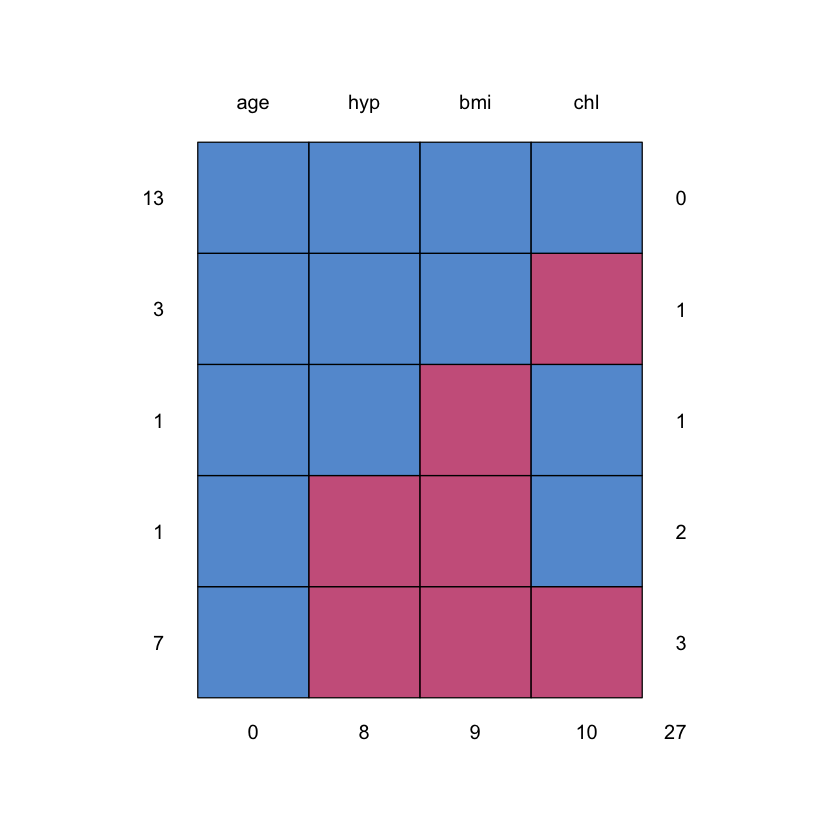

In [4]:
md.pattern(nhanes)

1表示观察到，0表示缺失

最后一列表示缺失变量数

In [5]:
# multiple imputations
imp <- mice(nhanes, seed = 23109)


 iter imp variable
  1   1  bmi  hyp  chl
  1   2  bmi  hyp  chl
  1   3  bmi  hyp  chl
  1   4  bmi  hyp  chl
  1   5  bmi  hyp  chl
  2   1  bmi  hyp  chl
  2   2  bmi  hyp  chl
  2   3  bmi  hyp  chl
  2   4  bmi  hyp  chl
  2   5  bmi  hyp  chl
  3   1  bmi  hyp  chl
  3   2  bmi  hyp  chl
  3   3  bmi  hyp  chl
  3   4  bmi  hyp  chl
  3   5  bmi  hyp  chl
  4   1  bmi  hyp  chl
  4   2  bmi  hyp  chl
  4   3  bmi  hyp  chl
  4   4  bmi  hyp  chl
  4   5  bmi  hyp  chl
  5   1  bmi  hyp  chl
  5   2  bmi  hyp  chl
  5   3  bmi  hyp  chl
  5   4  bmi  hyp  chl
  5   5  bmi  hyp  chl


In [6]:
print(imp)

Class: mids
Number of multiple imputations:  5 
Imputation methods:
  age   bmi   hyp   chl 
   "" "pmm" "pmm" "pmm" 
PredictorMatrix:
    age bmi hyp chl
age   0   1   1   1
bmi   1   0   1   1
hyp   1   1   0   1
chl   1   1   1   0


In [7]:
# modeling
fit <- with(imp, lm(chl ~ age + bmi))

In [8]:
# one model per imputation
print(fit)

call :
with.mids(data = imp, expr = lm(chl ~ age + bmi))

call1 :
mice(data = nhanes, seed = 23109)

nmis :
age bmi hyp chl 
  0   9   8  10 

analyses :
[[1]]

Call:
lm(formula = chl ~ age + bmi)

Coefficients:
(Intercept)          age          bmi  
    -41.404       36.478        6.627  


[[2]]

Call:
lm(formula = chl ~ age + bmi)

Coefficients:
(Intercept)          age          bmi  
     28.554       23.084        4.576  


[[3]]

Call:
lm(formula = chl ~ age + bmi)

Coefficients:
(Intercept)          age          bmi  
     25.312       23.882        4.834  


[[4]]

Call:
lm(formula = chl ~ age + bmi)

Coefficients:
(Intercept)          age          bmi  
    -32.897       45.292        5.486  


[[5]]

Call:
lm(formula = chl ~ age + bmi)

Coefficients:
(Intercept)          age          bmi  
     50.227       19.891        4.172  





In [10]:
# pool to form one solution

print(pool(fit))

Class: mipo    m = 5 
             estimate        ubar          b           t dfcom        df
(Intercept)  5.958468 3575.717813 1649.43830 5555.043768    22  9.216954
age         29.725360   82.553435  115.72029  221.417779    22  4.331856
bmi          5.138790    3.686724    0.91985    4.790544    22 12.907767
                  riv    lambda       fmi
(Intercept) 0.5535465 0.3563115 0.4616878
age         1.6821147 0.6271599 0.7288640
bmi         0.2994040 0.2304164 0.3271721


* lambda is the proportion of the total variance that is attributable to the missing data

In [11]:
summary(pool(fit))

,estimate,std.error,statistic,df,p.value
(Intercept),5.958468,74.532166,0.07994492,9.216954,0.93750725
age,29.725360,14.880114,1.99765683,4.331856,0.06727696
bmi,5.138790,2.188731,2.34783949,12.907767,0.03549532


In [12]:
# increase the number of imputations

imp50 <- mice(nhanes, m = 50, seed = 23109)


 iter imp variable
  1   1  bmi  hyp  chl
  1   2  bmi  hyp  chl
  1   3  bmi  hyp  chl
  1   4  bmi  hyp  chl
  1   5  bmi  hyp  chl
  1   6  bmi  hyp  chl
  1   7  bmi  hyp  chl
  1   8  bmi  hyp  chl
  1   9  bmi  hyp  chl
  1   10  bmi  hyp  chl
  1   11  bmi  hyp  chl
  1   12  bmi  hyp  chl
  1   13  bmi  hyp  chl
  1   14  bmi  hyp  chl
  1   15  bmi  hyp  chl
  1   16  bmi  hyp  chl
  1   17  bmi  hyp  chl
  1   18  bmi  hyp  chl
  1   19  bmi  hyp  chl
  1   20  bmi  hyp  chl
  1   21  bmi  hyp  chl
  1   22  bmi  hyp  chl
  1   23  bmi  hyp  chl
  1   24  bmi  hyp  chl
  1   25  bmi  hyp  chl
  1   26  bmi  hyp  chl
  1   27  bmi  hyp  chl
  1   28  bmi  hyp  chl
  1   29  bmi  hyp  chl
  1   30  bmi  hyp  chl
  1   31  bmi  hyp  chl
  1   32  bmi  hyp  chl
  1   33  bmi  hyp  chl
  1   34  bmi  hyp  chl
  1   35  bmi  hyp  chl
  1   36  bmi  hyp  chl
  1   37  bmi  hyp  chl
  1   38  bmi  hyp  chl
  1   39  bmi  hyp  chl
  1   40  bmi  hyp  chl
  1   41  bmi  hyp  chl
  1  

In [13]:
fit50 <- with(imp50, lm(chl ~ age + bmi))

In [14]:
summary(pool(fit50)) 

,estimate,std.error,statistic,df,p.value
(Intercept),-7.276001,66.466513,-0.1094687,14.30395,0.91425164
age,32.075691,11.515704,2.7853869,11.58145,0.01364981
bmi,5.470019,2.081697,2.6276726,15.32201,0.01877129


In [15]:
# choose approriate models to imputate different types of variables

imp_meth <- mice(nhanes, method = c("", "norm", "pmm", "mean"))


 iter imp variable
  1   1  bmi  hyp  chl
  1   2  bmi  hyp  chl
  1   3  bmi  hyp  chl
  1   4  bmi  hyp  chl
  1   5  bmi  hyp  chl
  2   1  bmi  hyp  chl
  2   2  bmi  hyp  chl
  2   3  bmi  hyp  chl
  2   4  bmi  hyp  chl
  2   5  bmi  hyp  chl
  3   1  bmi  hyp  chl
  3   2  bmi  hyp  chl
  3   3  bmi  hyp  chl
  3   4  bmi  hyp  chl
  3   5  bmi  hyp  chl
  4   1  bmi  hyp  chl
  4   2  bmi  hyp  chl
  4   3  bmi  hyp  chl
  4   4  bmi  hyp  chl
  4   5  bmi  hyp  chl
  5   1  bmi  hyp  chl
  5   2  bmi  hyp  chl
  5   3  bmi  hyp  chl
  5   4  bmi  hyp  chl
  5   5  bmi  hyp  chl


### 延伸阅读
* Van Buuren, S., Groothuis-Oudshoorn, K. (2011). mice: Multivariate Imputation by Chained Equations in R. Journal of Statistical Software, 45(3), 1-67. http://www.jstatsoft.org/v45/i03/

